# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\Decision tree\\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
None


In [8]:
# Display summary statistics
print(df.describe())

       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000


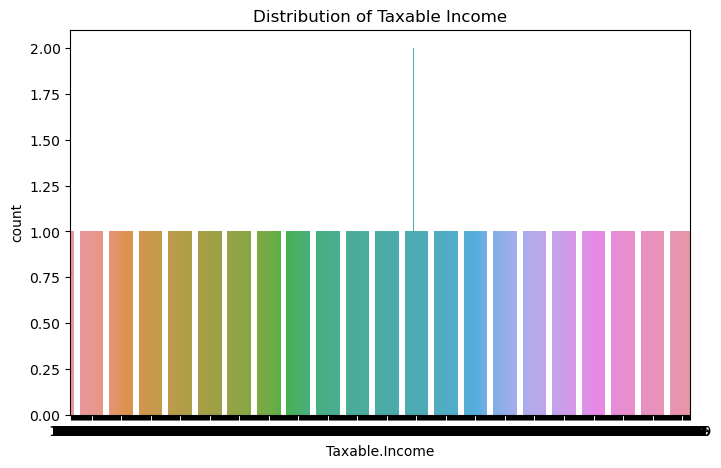

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Taxable.Income', data=df)
plt.title('Distribution of Taxable Income')
plt.show()

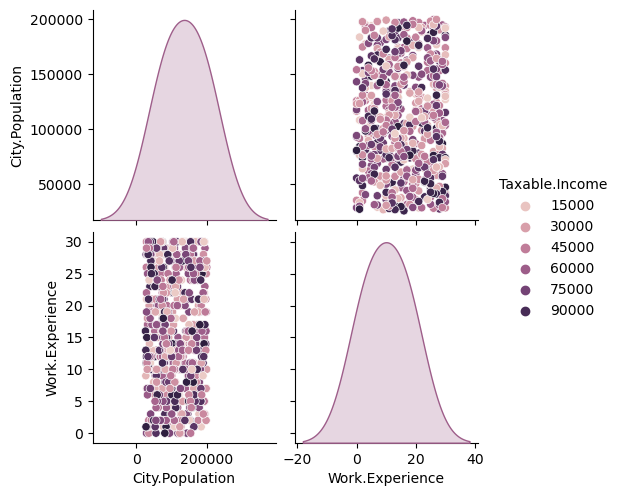

In [10]:
# Visualize relationships between features and the target variable
# Example: Use pairplot for numerical variables
sns.pairplot(df, hue='Taxable.Income')
plt.show()

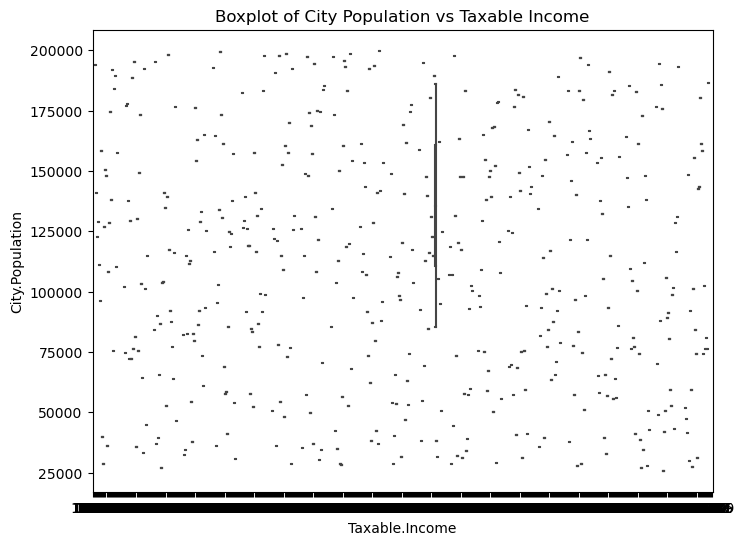

In [13]:
# Example: Boxplot for City.Population and Taxable.Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Taxable.Income', y='City.Population', data=df)
plt.title('Boxplot of City Population vs Taxable Income')
plt.show()

In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
# Display information about missing values
print("Missing Values Before Cleaning:\n", df.isnull().sum())

Missing Values Before Cleaning:
 Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [16]:
# Remove missing values
df.dropna(inplace=True)

In [17]:
# Handle outliers 
# Example: Remove rows with City.Population greater than a certain threshold
outlier_threshold = 200000
df = df[df['City.Population'] <= outlier_threshold]

In [18]:
# Display information after cleaning
print("\nDataset Information After Cleaning:")
print("Number of Duplicate Rows:", df.duplicated().sum())
print("Missing Values After Cleaning:\n", df.isnull().sum())


Dataset Information After Cleaning:
Number of Duplicate Rows: 0
Missing Values After Cleaning:
 Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


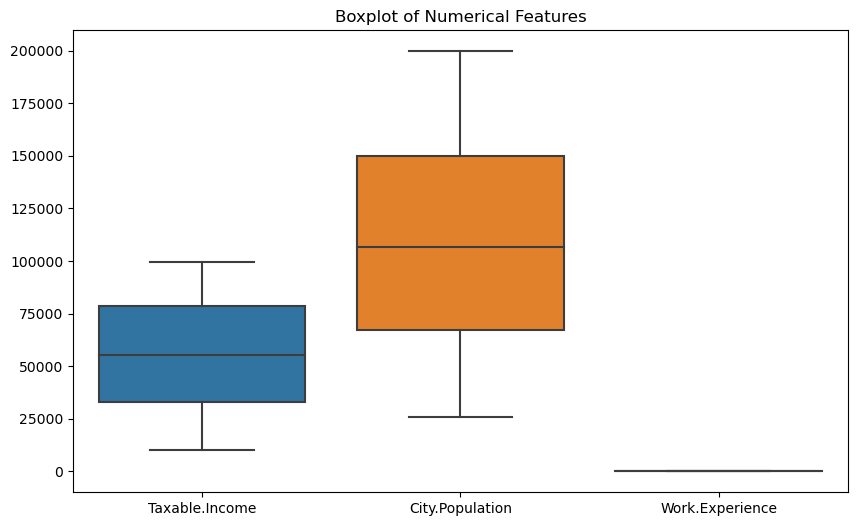

In [20]:
# Visualize the distribution of numerical features to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Taxable.Income', 'City.Population', 'Work.Experience']])
plt.title('Boxplot of Numerical Features')
plt.show()

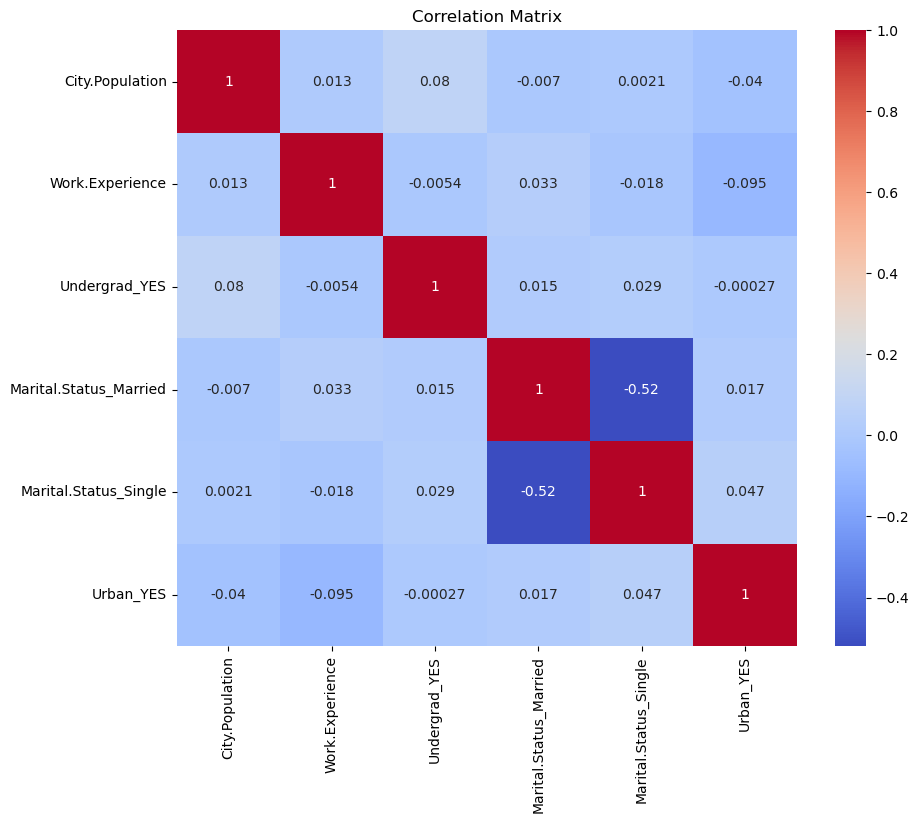

In [7]:
# Assuming you want to use all columns except the target as features
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Importances:
                  Feature  Importance
0         City.Population    0.518011
1         Work.Experience    0.355781
2           Undergrad_YES    0.038855
5               Urban_YES    0.036086
4   Marital.Status_Single    0.025655
3  Marital.Status_Married    0.025613


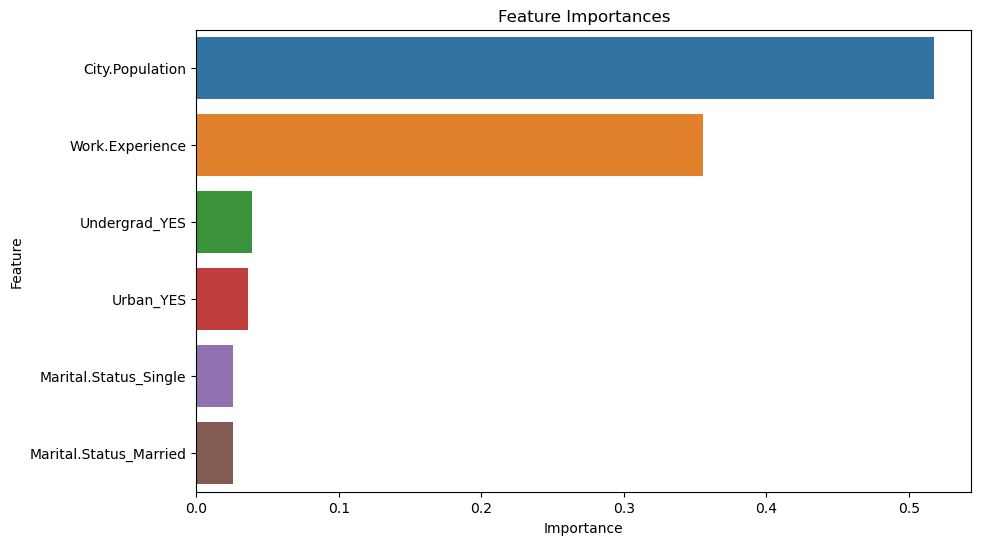

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier to get feature importances
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = "C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\Decision tree\\Fraud_check.csv"
df = pd.read_csv(file_path)

# Select the specified features and target variable
X = df[['City.Population', 'Work.Experience', 'Undergrad', 'Urban']]
y = df['Taxable.Income']

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
X['Undergrad'] = label_encoder.fit_transform(X['Undergrad'])
X['Urban'] = label_encoder.fit_transform(X['Urban'])

# Create a binary classification column based on taxable_income
y = y.apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation with Best Hyperparameters:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

Model Evaluation with Best Hyperparameters:
Accuracy: 0.7083333333333334
Confusion Matrix:
 [[85  9]
 [26  0]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.77      0.90      0.83        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [37]:
# Calculate training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7201051248357424
Testing Accuracy: 0.6701570680628273


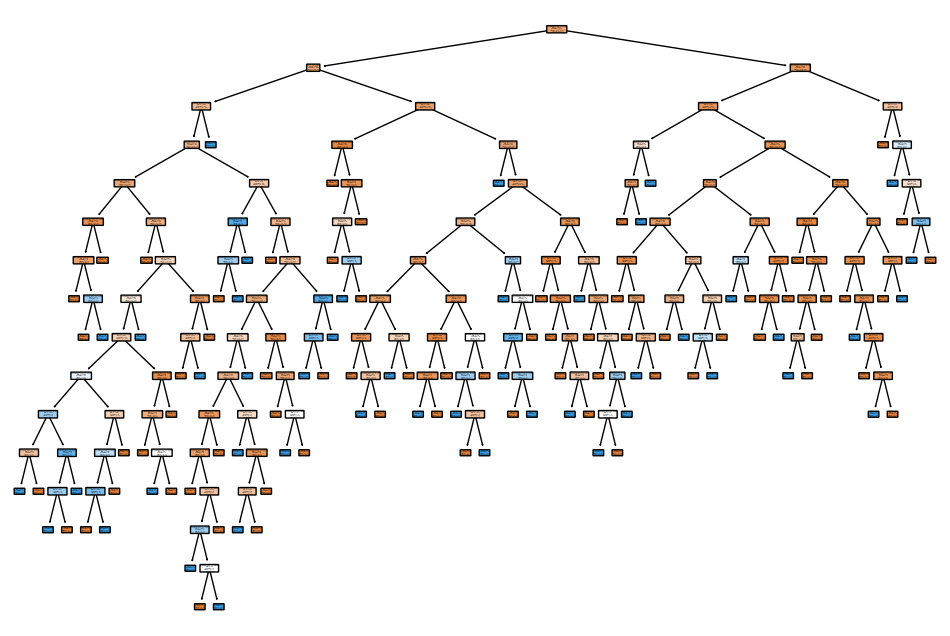

In [40]:
from sklearn import tree
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=rf_classifier.classes_, filled=True, rounded=True)
plt.show()
